## Import Dataset

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel("/content/data (1).xlsx")

In [ ]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
data.shape

(3998, 39)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

# Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numerical_cols = data.select_dtypes(include=['float64','int64']).columns

<ipython-input-13-0dfd8c26c474>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,6))


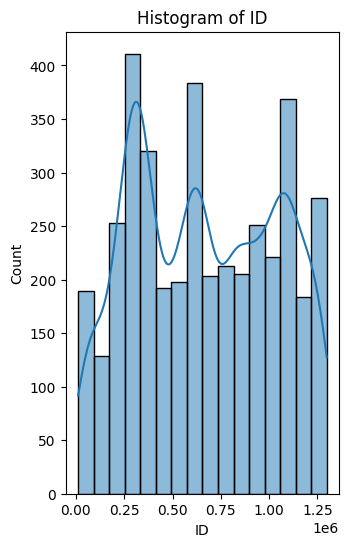

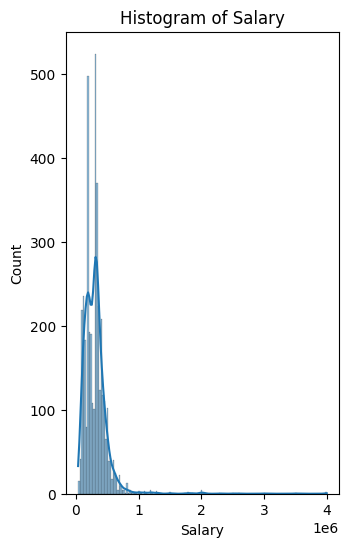

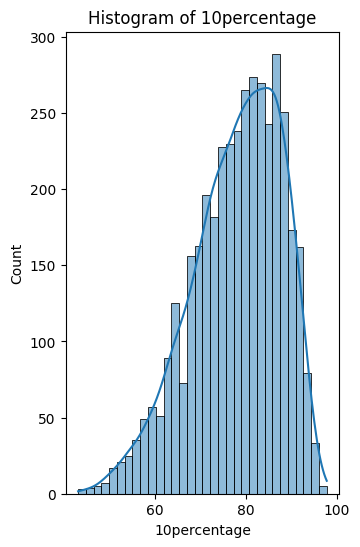

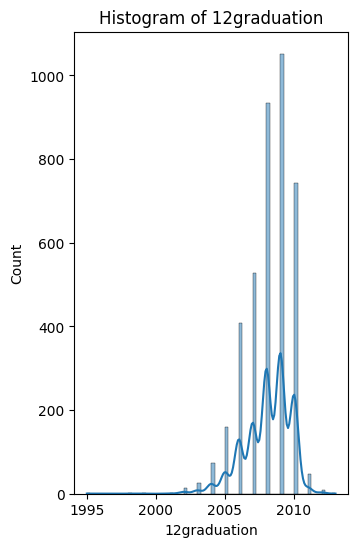

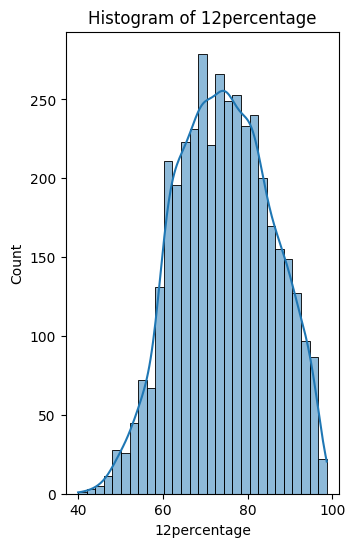

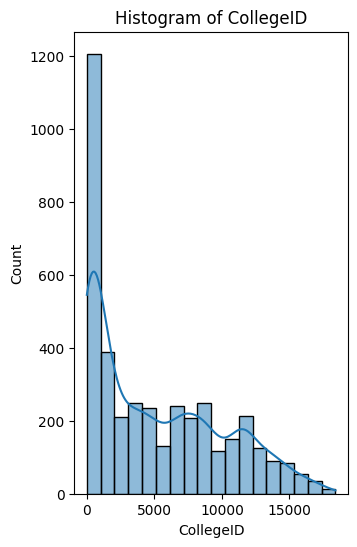

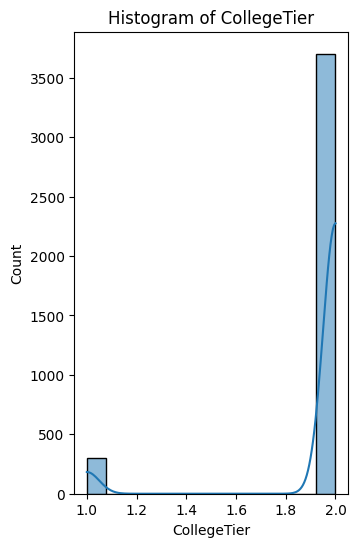

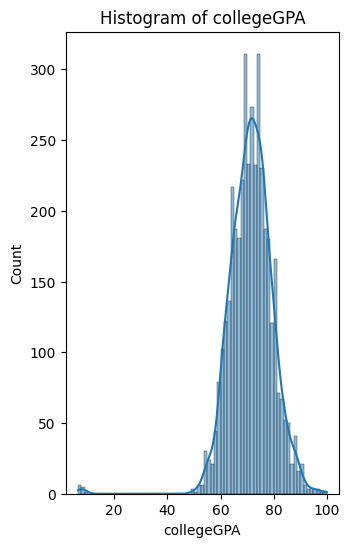

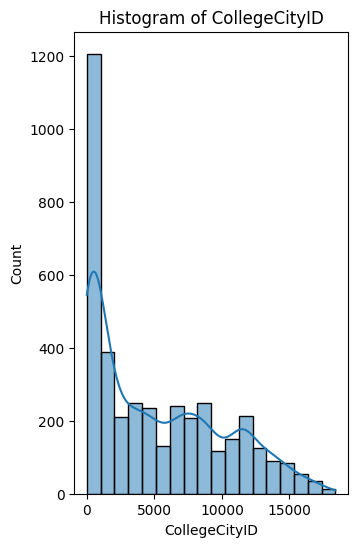

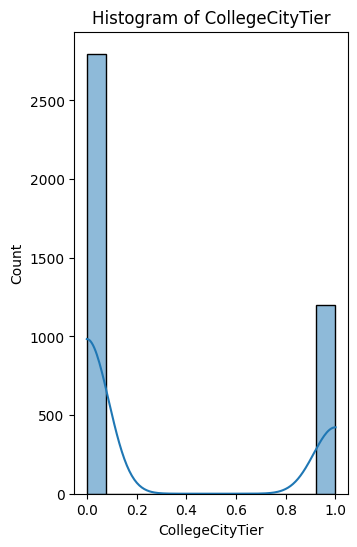

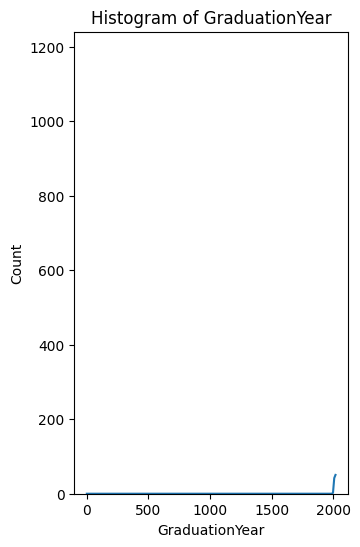

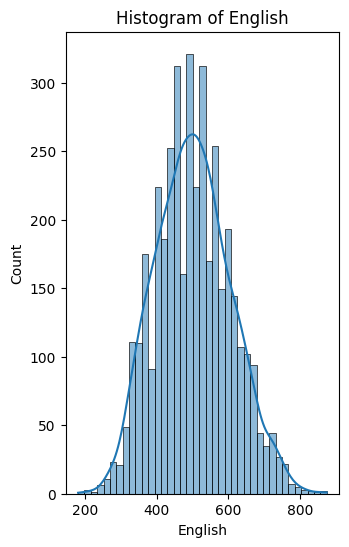

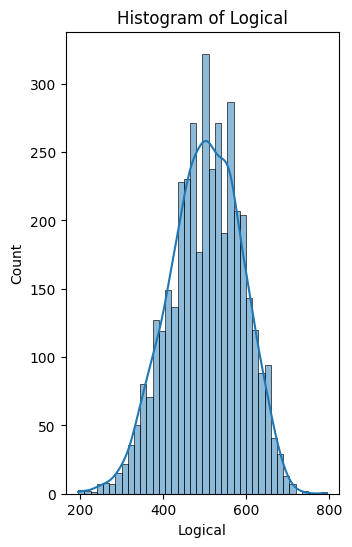

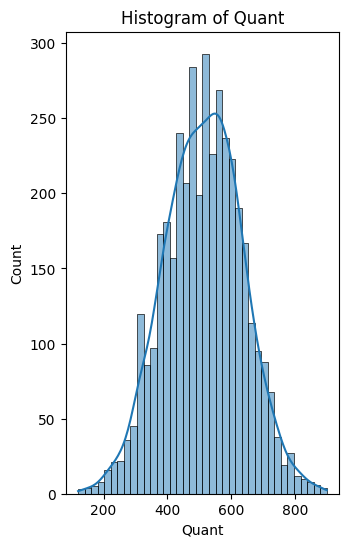

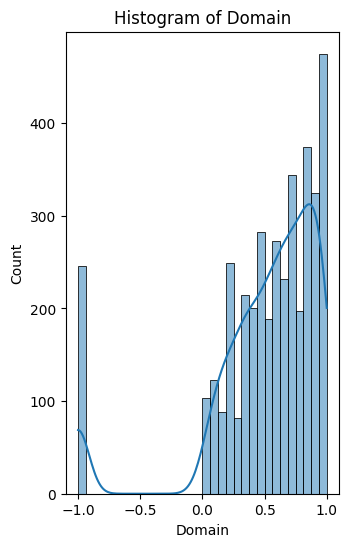

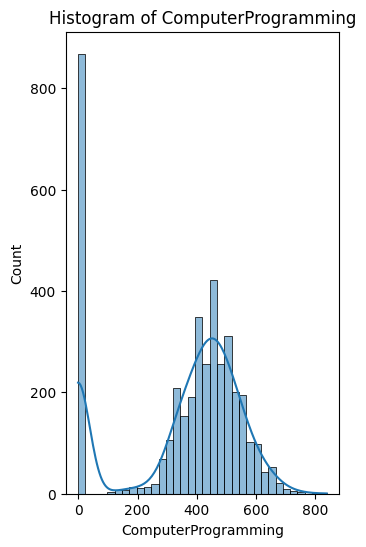

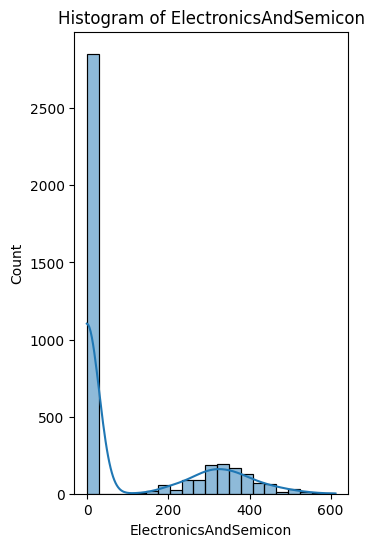

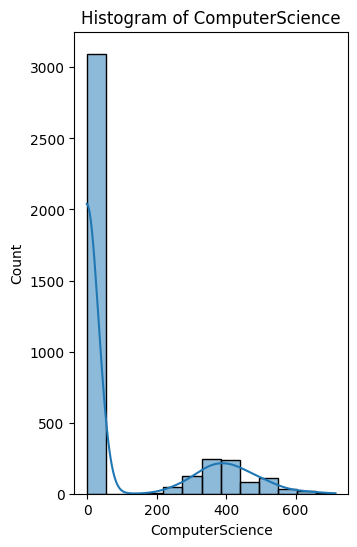

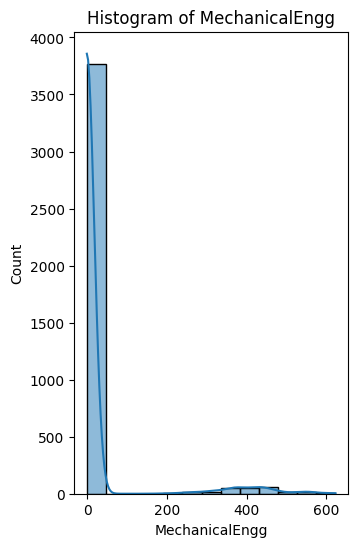

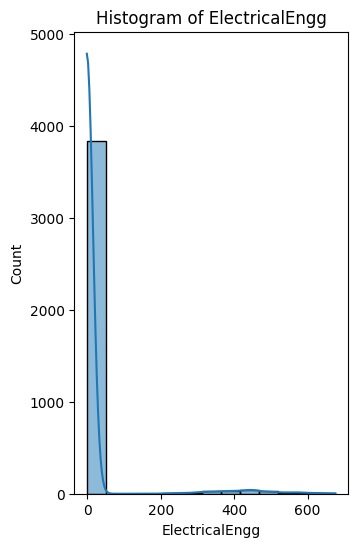

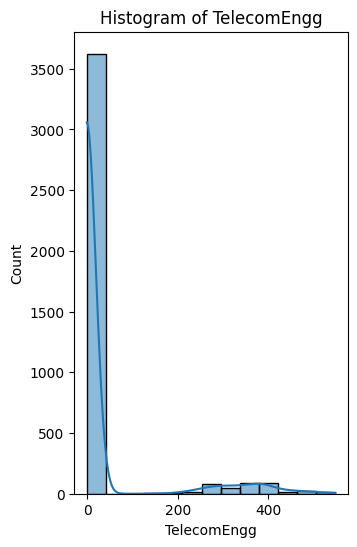

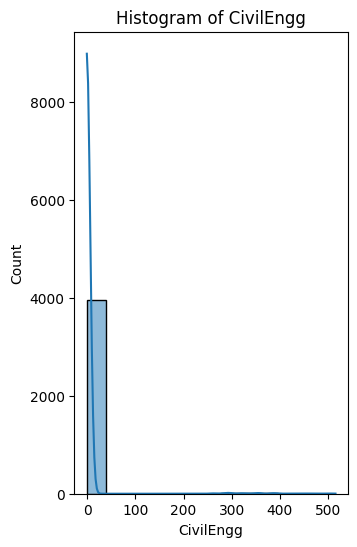

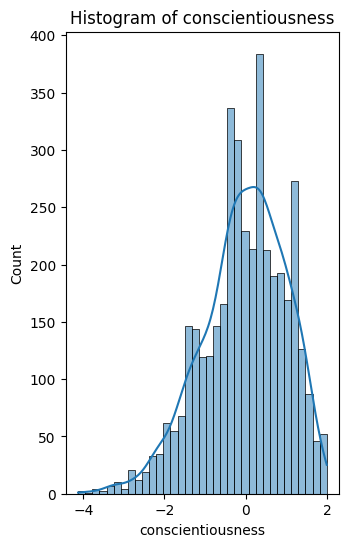

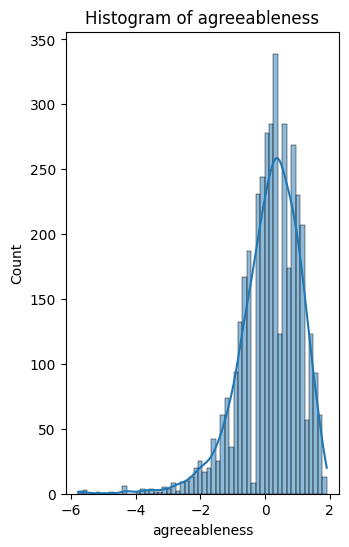

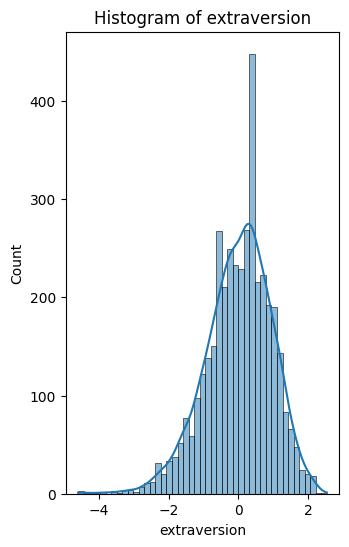

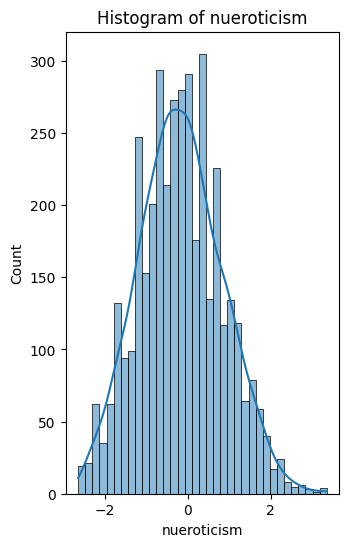

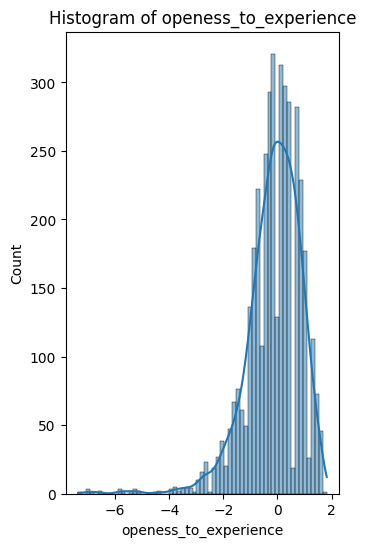

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(12,6))

    plt.subplot(1,3,1)
    sns.histplot(data[col],kde=True)
    plt.title(f'Histogram of {col}')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of openess_to_experience')

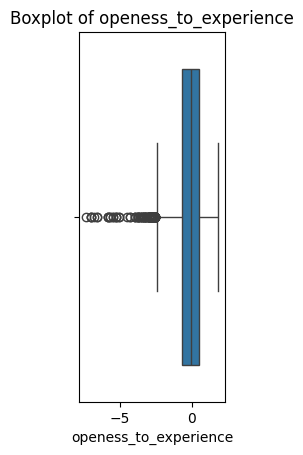

In [ ]:
plt.subplot(1,3,2)
sns.boxplot(x=data[col])
plt.title(f'Boxplot of {col}')


<ipython-input-15-3b69e966c0ad>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],shade=True)


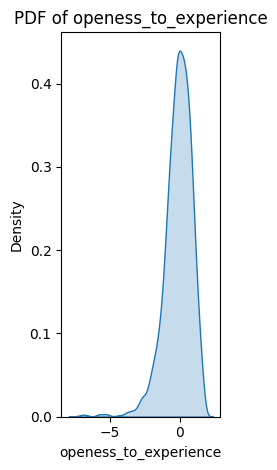

In [ ]:
plt.subplot(1,3,3)
sns.kdeplot(data[col],shade=True)
plt.title(f'PDF of {col}')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

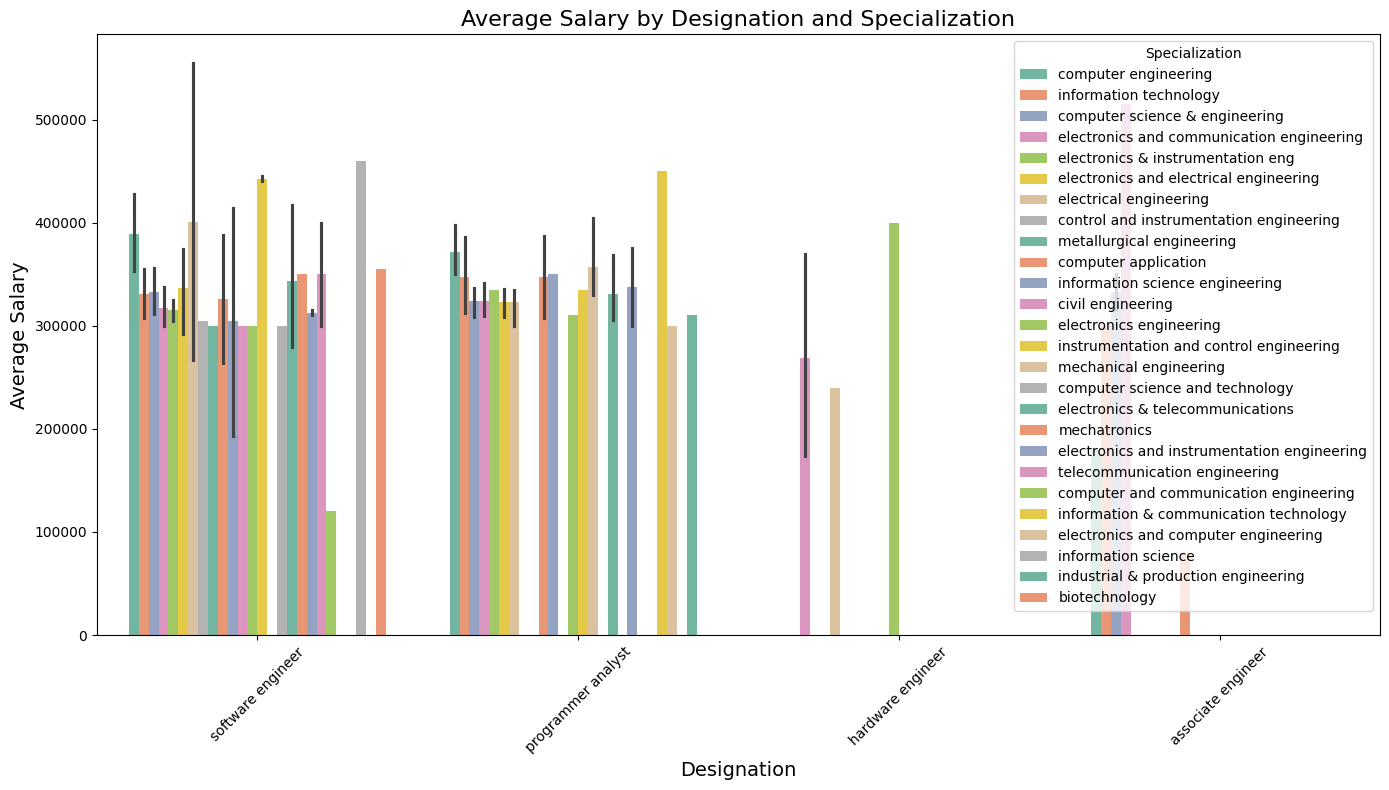

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Designation', y='Salary', hue='Specialization', data=claim_1_data, palette='Set2')
plt.title('Average Salary by Designation and Specialization', fontsize=16)
plt.xlabel('Designation', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Specialization')
plt.tight_layout()
plt.show()


In [ ]:
outliers = data[col][(data[col] < data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))) |
                          (data[col] > data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)))]
print(f'Outliers in {col}: {outliers.count()}')

Outliers in openess_to_experience: 95


# Bivariate Analysis

In [ ]:
1. *Numerical vs. Numerical*:
   - Use scatter plots, hexbin plots, and pair plots.

python
sns.scatterplot(x='numerical_column1', y='numerical_column2', data=data)
plt.title('Scatter Plot between Numerical Column 1 and 2')
plt.show()

In [ ]:
sns.scatterplot(x='numerical_columns',y='numerical_column2', data=data)
plt.title('Scatter Plot between Numerical Column 1 and 2')
plt.show()

ValueError: Could not interpret value `numerical_columns` for `x`. An entry with this name does not appear in `data`.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

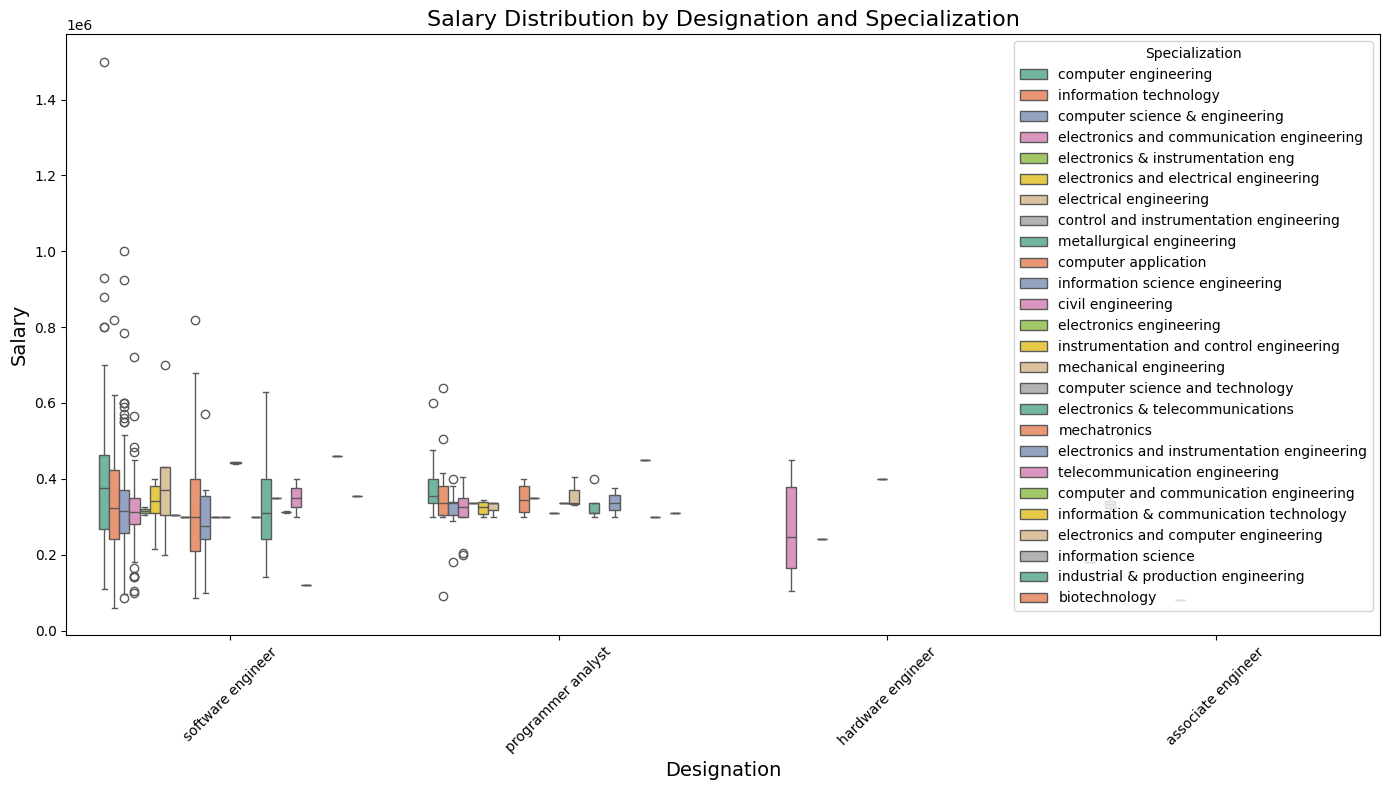

In [ ]:

designations = ["programmer analyst", "software engineer", "hardware engineer", "associate engineer"]
claim_1_data = data[data['Designation'].isin(designations)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Designation', y='Salary', hue='Specialization', data=claim_1_data, palette='Set2')
plt.title('Salary Distribution by Designation and Specialization', fontsize=16)
plt.xlabel('Designation', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Specialization')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

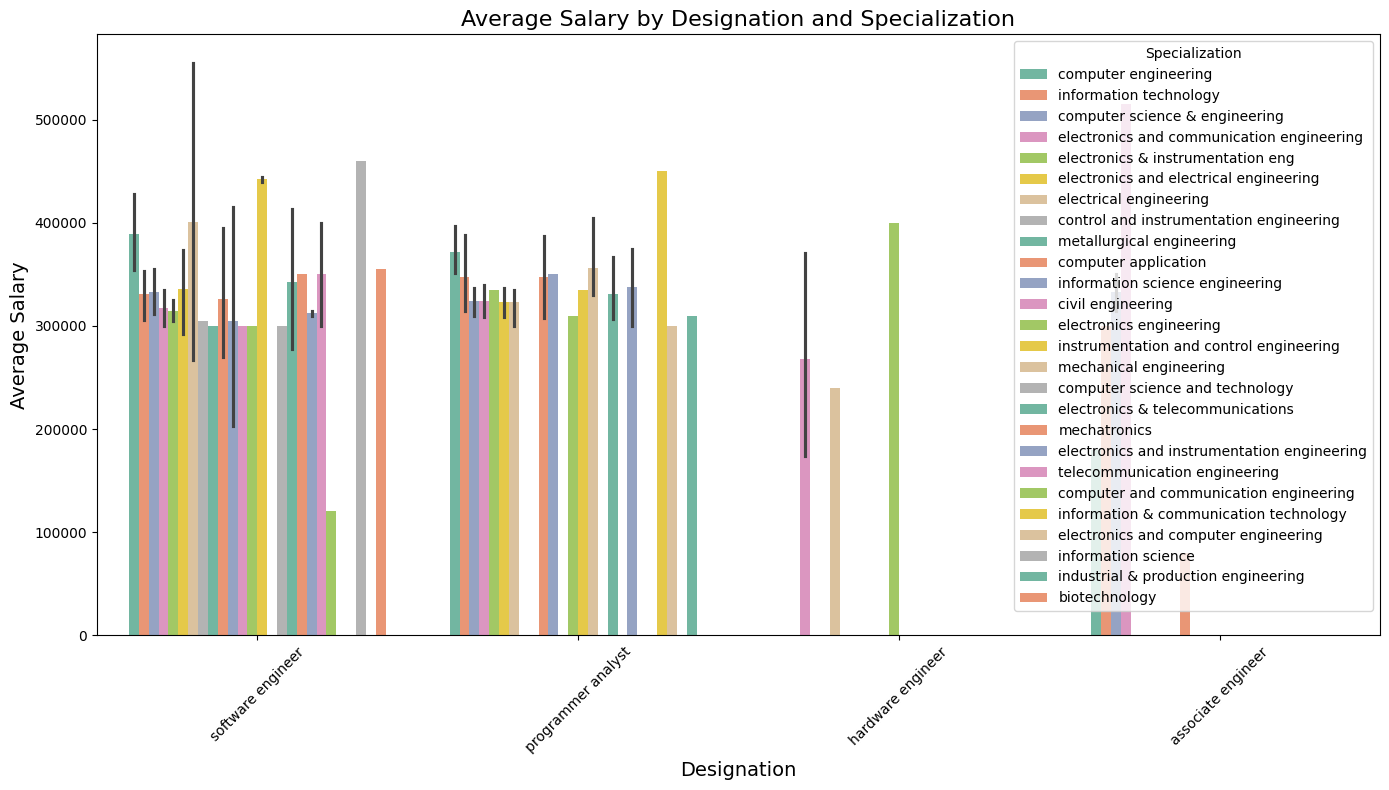

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Designation', y='Salary', hue='Specialization', data=claim_1_data, palette='Set2')
plt.title('Average Salary by Designation and Specialization', fontsize=16)
plt.xlabel('Designation', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Specialization')
plt.tight_layout()
plt.show()


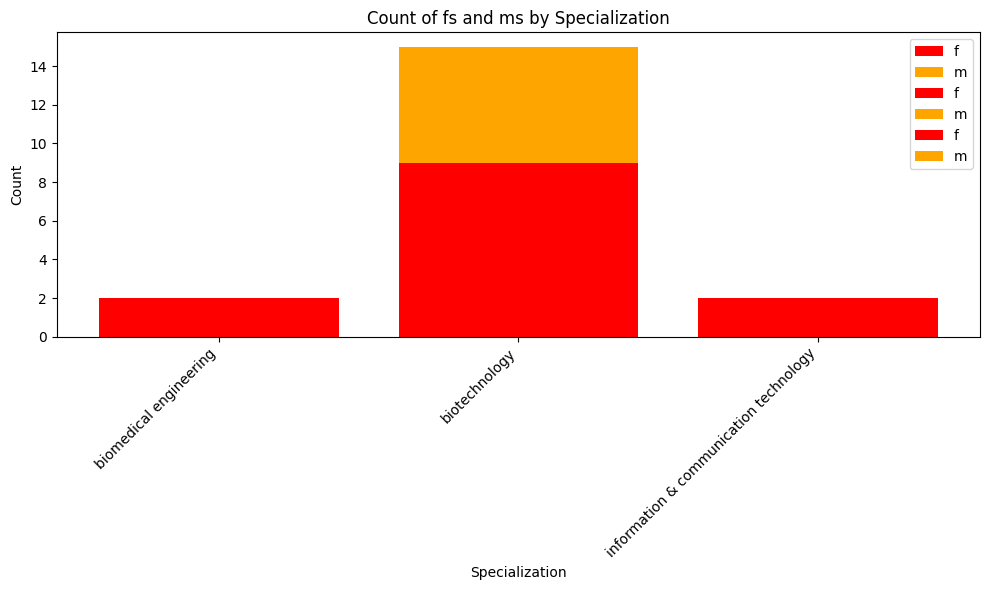

In [ ]:
Gender_counts = data.groupby(['Specialization', 'Gender']).size().unstack(fill_value=0)

f_outnumber = Gender_counts['f'] > Gender_counts['m']

Specializations_f_outnumber = f_outnumber[f_outnumber].index.tolist()

plt.figure(figsize=(10, 6))

for Specialization in Specializations_f_outnumber:
    f_count = Gender_counts.loc[Specialization, 'f']
    m_count = Gender_counts.loc[Specialization, 'm']
    plt.bar(Specialization, f_count, color='red', label='f')
    plt.bar(Specialization, m_count, bottom=f_count, color='orange', label='m')

plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Count of fs and ms by Specialization')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
claim_1_data = data[(data['Designation'].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"]))]

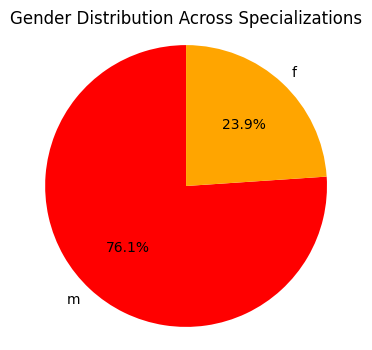

In [ ]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['red', 'orange'], startangle=90)
plt.title('Gender Distribution Across Specializations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()